# ПРОЕКТ: Исследование рынка компьютерных игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

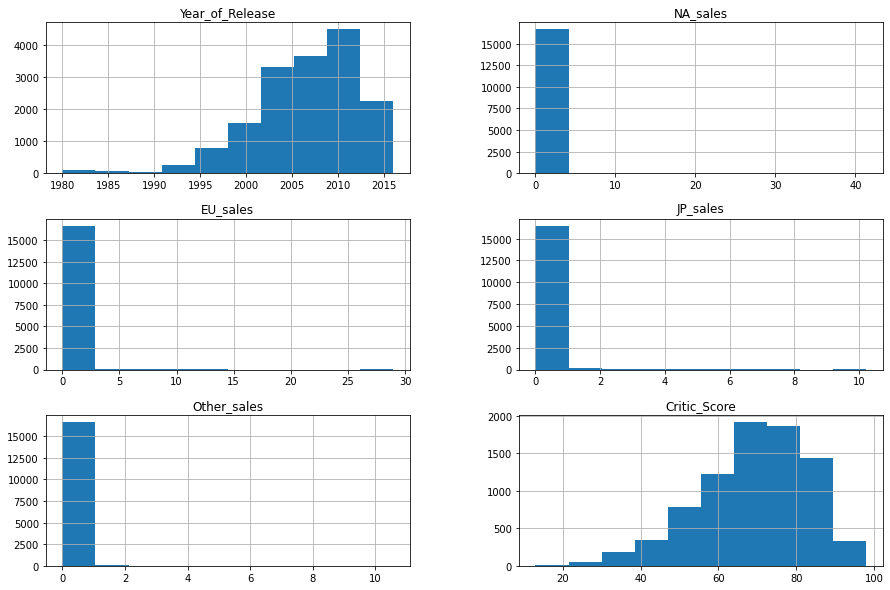

In [8]:
df.hist(figsize=(15, 10));

In [9]:
df.duplicated().sum()

0

In [10]:
df['Name']= df['Name'].str.lower()
df['Platform']= df['Platform'].str.lower()
df[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)
   ].sort_values(by = 'Name', ascending = True)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,madden nfl 13,ps3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- выявлены две пары неявных дубликатов. Строку с индексом 16230 удалим, строки с пропусками проанализируем в следующем разделе 

In [11]:
df = df.drop(index=16230)

**Вывод:**
- в 6 из 11 столбцов есть пропуски - необходимо проанализировать и, по возможности, их заполнить.
- столбцы с типом object необходимо проанализировать и, возможно, преобразовать в другой тип.
- необходимо отформатировать названия столбцов.
- явных дубликатов не обнаружено, удален 1 неявный дубликат.

## Шаг 2. Подготовьте данные 

### Замена названий столбцов

- приведем названия столбцов к нижнему регистру:

In [12]:
df.columns = df.columns.str.lower()
df.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Преобразование данных в нужные типы. Обработка пропусков при необходимости

#### Столбец `name`

- повторяемость названий обусловлена количеством платформ, на которых вышла игра:

In [13]:
df['name'].value_counts()

need for speed: most wanted         12
fifa 14                              9
madden nfl 07                        9
lego marvel super heroes             9
ratatouille                          9
                                    ..
metal dungeon                        1
socom: tactical strike               1
tamagotchi no kirakira omisecchi     1
invizimals: the lost kingdom         1
god of war                           1
Name: name, Length: 11559, dtype: int64

In [14]:
df.query('name == "FIFA 14"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


- в двух играх, вышедших на платформе Genesis в 1993 году, не указаны названия и жанр. Возможные причины отсутствия данных - ошибка при слиянии данных из разных источников. Удалим эти строки ввиду невозможности заполнения отсутствующих данных (доля порядка 0.01%, что незначительно): 

In [15]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
df = df.dropna(subset=['name']).reset_index(drop=True)

#### Столбец `platform`

- реализуем функцию вывода ключевой информации про столбец - будет использоваться и для анализа следующих столбцов:

In [17]:
def info_func(col):
    print(col.unique())
    print('*'*50)
    print('Количество значений:',col.value_counts().count())
    print('Количество пропусков:', df.loc[col.isna()]['name'].count(),
          'Доля пропусков:', ((df.loc[col.isna()]['name'].count() / df['name'].count()) * 100).round(1), '%')

- Платформа - это электронное вычислительное устройство, способное воспроизводить видео игры. В столбце 31 уникальное название:

In [18]:
info_func(df['platform'])

['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']
**************************************************
Количество значений: 31
Количество пропусков: 0 Доля пропусков: 0.0 %


#### Столбец `year_of_release`

- преобразуем тип данных в столбце в строковый для удобства дальнейшего заполнения пропусков:

In [19]:
df['year_of_release'].head(3)

0    2006.0
1    1985.0
2    2008.0
Name: year_of_release, dtype: float64

In [21]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'].head(3)

0   2006-01-01
1   1985-01-01
2   2008-01-01
Name: year_of_release, dtype: datetime64[ns]

- 269 пропусков, зависимости пропуска в данных от конкретной игры, платформы или жанра не наблюдается. Пропущенные данные есть в интернет, их восстановление трудозатратно из-за большого количества. 
- возможные причины образования пропусков - ошибки при слиянии/объединении/преобразовании данных из разных источников при формировании датасета. 

In [22]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16370,pdc world championship darts 2008,psp,NaT,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16402,freaky flyers,gc,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16445,inversion,pc,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16455,hakuouki: shinsengumi kitan,ps3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Из срезов ниже видно, что:
- если игра вышла на нескольких платформах, то год релиза можно взять из других строк с игрой и заполнить пропущенные значения;
- утверждение выше верно не всегда! Бывает, что год релиза игры на разных платформах отличается.

In [23]:
df[df['name'].str.contains('LEGO Batman: The Videogame')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [24]:
df.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


- реализуем функцию для автоматического заполнения пропусков. Возможно она будет пригодна для заполнения пропусков и в других столбцах:

In [25]:
def filling_gaps_func(df, col): #col - столбец, пропуски в котором надо заполнить
    gaps_indexes = df[df[col].isna()].index #формируем список индексов строк с NaN в столбце col
    number_nan = len(gaps_indexes) #количество пропусков
    number = 0 #счетчик заполненных пропусков
    for i in gaps_indexes: #крутим индексы строк
        name_gap = ''.join(df.query('index == @i')['name'].tolist()) #запоминаем имя игры
        if df.query('name == @name_gap')['name'].count() > 1: #строк с именем должно быть больше одной
            #формируем список индексов строк с искомым именем и значением в столбце col не NaN
            name_indexes = df.loc[(df['name'] == name_gap) & (~df[col].isna())].index
            #если значения в столбце col в отобранных строках одинаковые, то длина их множества равна 1
            if len(set(df.loc[df.index.isin(name_indexes)][col])) == 1:
                #заполняем пропуск значением года релиза из отобранных строк
                #print('*'*50)
                df.loc[i, col] = df.loc[name_indexes[0]][col]
                #print('*'*50)
                #print(df.query('name == @name_gap'))
                #print('*'*50)
                number +=1
    print(f'Было пропусков: {number_nan}, заполнено: {number}, осталось: {number_nan - number}')

def filling_gaps_func(df):
    gaps_indexes = df[df['year_of_release'].isna()].index
    for i in gaps_indexes:
        name_gap = ''.join(df.query('index == @i')['name'].tolist())
        if df.query('name == @name_gap')['name'].count() > 1:
            name_indexes = df.loc[(df['name'] == name_gap) & (~df['year_of_release'].isna())].index
            if len(set(df.loc[df.index.isin(name_indexes)]['year_of_release'])) == 1:
                df.loc[i, 'year_of_release'] = df.loc[name_indexes[0]]['year_of_release']

In [26]:
filling_gaps_func(df, 'year_of_release')

Было пропусков: 269, заполнено: 111, осталось: 158


- можно заполнить еще несколько пропусков. В названии некоторых игр есть год, значит год релиза был предыдущим (вывод сделан на основании описания нескольких игр в интернет). Заполним эти пропуски вручную, их 9 штук.

In [29]:
sorted(df[df['year_of_release'].isna()]['name'].unique())

['action man-operation extreme',
 'advance wars: days of ruin',
 'adventure',
 'agarest senki: re-appearance',
 'air-sea battle',
 'alex rider: stormbreaker',
 'all-star baseball 2005',
 'alone in the dark: the new nightmare',
 'atsumare! power pro kun no ds koushien',
 'b.l.u.e.: legend of water',
 'backbreaker',
 'beyond the labyrinth',
 'big beach sports 2',
 'bikkuriman daijiten',
 'breakaway iv',
 'build-a-bear workshop: friendship valley',
 'charm girls club: my fashion mall',
 'charm girls club: my fashion show',
 'chou soujuu mecha mg',
 'circus atari',
 'clockwork empires',
 'college hoops 2k6',
 'combat',
 'combat elite: wwii paratroopers',
 'combat wings: the great battles of wwii',
 "cubix robots for everyone: clash 'n' bash",
 'dancedancerevolution ii',
 'demon chaos',
 'disgaea 3: absence of detention',
 "disney's cinderella: magical dreams",
 'donkey kong land iii',
 'dragon ball z: budokai tenkaichi 2 (jp sales)',
 'dragster',
 'drake of the 99 dragons',
 'dream dancer'

In [30]:
year_release_dict = {'All-Star Baseball 2005': '2004', 'Football Manager 2007': '2006', 'NFL GameDay 2003': '2002', 
                     'PES 2009: Pro Evolution Soccer': '2008', 'Sega Rally 2006': '2005', 
                     'Tomb Raider (2013)': '2012', 'Tour de France 2011': '2010', 'Triple Play 99': '1998', 
                     'wwe Smackdown vs. Raw 2006': '2005'}

In [31]:
for key, value in year_release_dict.items():
    df.loc[df['name'] == key, 'year_of_release'] = value

- в столбце 37 уникальных значений c 1980 по 2016:

In [32]:
info_func(df['year_of_release'])

[Timestamp('2006-01-01 00:00:00') Timestamp('1985-01-01 00:00:00')
 Timestamp('2008-01-01 00:00:00') Timestamp('2009-01-01 00:00:00')
 Timestamp('1996-01-01 00:00:00') Timestamp('1989-01-01 00:00:00')
 Timestamp('1984-01-01 00:00:00') Timestamp('2005-01-01 00:00:00')
 Timestamp('1999-01-01 00:00:00') Timestamp('2007-01-01 00:00:00')
 Timestamp('2010-01-01 00:00:00') Timestamp('2013-01-01 00:00:00')
 Timestamp('2004-01-01 00:00:00') Timestamp('1990-01-01 00:00:00')
 Timestamp('1988-01-01 00:00:00') Timestamp('2002-01-01 00:00:00')
 Timestamp('2001-01-01 00:00:00') Timestamp('2011-01-01 00:00:00')
 Timestamp('1998-01-01 00:00:00') Timestamp('2015-01-01 00:00:00')
 Timestamp('2012-01-01 00:00:00') Timestamp('2014-01-01 00:00:00')
 Timestamp('1992-01-01 00:00:00') Timestamp('1997-01-01 00:00:00')
 Timestamp('1993-01-01 00:00:00') Timestamp('1994-01-01 00:00:00')
 Timestamp('1982-01-01 00:00:00') Timestamp('2016-01-01 00:00:00')
 Timestamp('2003-01-01 00:00:00') Timestamp('1986-01-01 00:00:

#### Столбец `genre`

- в столбце 12 уникальных названий:

In [33]:
info_func(df['genre'])

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
**************************************************
Количество значений: 12
Количество пропусков: 0 Доля пропусков: 0.0 %


#### Столбец `critic_score`

- столбец содержит 82 уникальные оценки;
- доля пропусков большая и составляет 51% от количества строк в таблице. Возможно попробовать их заполнить по каждой игре усредненными данными по ней же с других платформ. Объем к заполнению большой, написанная функция будет долго перебирать массив данных, необходимость такого заполнения пока не понятна - оставим пропуски как есть. 

In [34]:
info_func(df['critic_score'])

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
**************************************************
Количество значений: 82
Количество пропусков: 8576 Доля пропусков: 51.3 %


#### Столбец `user_score`

- столбец содержит 96 уникальных оценок;
- доля пропусков большая и составляет 40% от количества строк в таблице. Возможно попробовать их заполнить по каждой игре усредненными данными по ней же с других платформ. Объем к заполнению большой, написанная функция будет долго перебирать массив данных, необходимость такого заполнения не понятна - оставим пока пропуски как есть. ;
- аббревиатура tbd расшифровывается как To Be Determined, что в переводе "будет определено" - то есть оценка готовится к выходу, но пока ее нет. Заменим такие значения на NaN. Итоговая доля пропусков составила - 55%;
- так как после удаления tbd остались только числовые оценки, присвоим значениям столбца тип float.

In [35]:
info_func(df['user_score'])

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
**************************************************
Количество значений: 96
Количество пропусков: 6699 Доля пропусков: 40.1 %


In [36]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [37]:
(df.loc[df['user_score'].isna()]['name'].count() / df['name'].count()).round(2)

0.55

In [38]:
df['user_score'] = df['user_score'].astype('float')

#### Столбец `rating`

Краткая расшифровка значений рейтингов возрастных категорий:
- EC - подходит для детей от 3 лет;
- E - для всех возрастных категорий;
- E10+ - для лиц старше 10 лет;
- T - для лиц старше 13 лет;
- M - для лиц старше 17 лет;
- AO - для взрослых старше 18 лет;
- RP - категория **еще не присвоена**;
- K-A - категория для детей и взрослых, использовалась до 1998 года, **далее была переименована в E**.

In [39]:
df[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985-01-01 00:00:00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996-01-01 00:00:00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989-01-01 00:00:00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984-01-01 00:00:00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005-01-01 00:00:00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


- как и в столбце `year_of_release` встречаются игры данными о рейтинге на других платформах. Применим ранее написанную функцию заполнения пропусков и для этого столбца:

In [40]:
df.query('name == "Mortal Kombat"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [41]:
filling_gaps_func(df, 'rating')

Было пропусков: 6764, заполнено: 416, осталось: 6348


- объединим категорию EC с E и AO с M, так как они схожи по значению:  

In [42]:
df['rating'].value_counts()

E       4145
T       3084
M       1653
E10+    1464
EC        10
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

In [43]:
df.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,theme hospital,pc,1997-01-01 00:00:00,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
902,parappa the rapper,ps,1996-01-01 00:00:00,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
11229,theme hospital,ps,1998-01-01 00:00:00,Strategy,0.03,0.02,0.03,0.01,NaN,NaN,K-A
16678,worms 2,pc,1997-01-01 00:00:00,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [44]:
df.loc[df['rating'] == 'EC', 'rating'] = 'E'
df.loc[df['rating'] == 'AO', 'rating'] = 'M'

- заменим категорию K-A на E, категорию RP на NaN:

In [45]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'RP', 'rating'] = np.nan

- доля пропусков большая и составляет 38% (заполнили 2%), вариантов для быстрого восстановления данных больше нет;
- столбец содержит 4 уникальные оценки.

In [46]:
info_func(df['rating'])

['E' nan 'M' 'T' 'E10+']
**************************************************
Количество значений: 4
Количество пропусков: 6351 Доля пропусков: 38.0 %


In [47]:
df.sort_values(by = 'name', ascending = True).head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14981,beyblade burst,3ds,2016-01-01 00:00:00,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1078,fire emblem fates,3ds,2015-01-01 00:00:00,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3861,frozen: olaf's quest,ds,2013-01-01 00:00:00,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3357,frozen: olaf's quest,3ds,2013-01-01 00:00:00,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
13793,haikyu!! cross team match!,3ds,2016-01-01 00:00:00,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2453,tales of xillia 2,ps3,2012-01-01 00:00:00,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
4727,'98 koshien,ps,1998-01-01 00:00:00,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
8341,.hack//g.u. vol.1//rebirth,ps2,2006-01-01 00:00:00,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7086,.hack//g.u. vol.2//reminisce,ps2,2006-01-01 00:00:00,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8596,.hack//g.u. vol.2//reminisce (jp sales),ps2,2006-01-01 00:00:00,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [48]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01 00:00:00,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01 00:00:00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01 00:00:00,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01 00:00:00,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01 00:00:00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Выводы:**
- названия столбцов привели к нижнему регистру;
- причины наличия пропусков - ошибки при слиянии/объединении/преобразовании данных из разных источников при формировании датасета, либо отсутствие таких данных в принципе (игры не оценивались, не рейтинговались);
- удалось заполнить часть пропусков в столбцах `year_of_release`, `rating` за счет имеющихся данных по этим играм по другим платформам;
- данные со значениями "будет определено" / "еще не присвоено" заменили на NaN;
- добавили столбец с суммарными продажами.

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

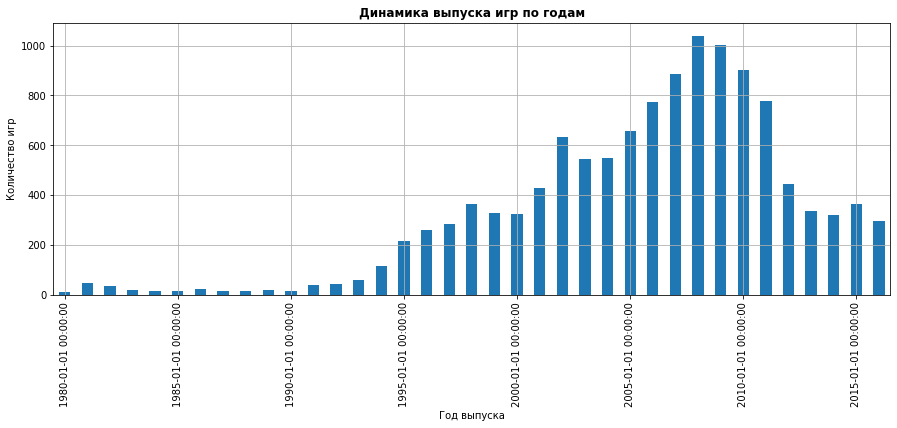

In [50]:
df.pivot_table(index='year_of_release', values='name', aggfunc=pd.Series.nunique
              ).plot(kind='bar', grid=True, figsize=(15, 5), legend=False)
plt.title('Динамика выпуска игр по годам', weight='bold')
plt.locator_params(axis="x", nbins=9)
#plt.xticks(rotation=90)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

**Вывод:** 
1. Бурный рост игровой индустрии начался с 1993 года, пик пришелся на 2008-2009 годы. Мировой финансовый кризис 2008 года существенно отразился и на играх - рынок игр резко падает. С 2012 года продолжается плавное падение вплоть до 2016 года, в том числе за счет перераспределения рынка с консолей на мобильные и онлайн приложения.
2. Ввиду того, что рынок изменился, то для анализа и прогнозирования будут важны свежие данные, например, за последние 3 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [51]:
top_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum'
              ).sort_values(by='total_sales', ascending=False).query('total_sales > 259').reset_index()
top_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.64
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


In [52]:
top_platforms_df = df.pivot_table(index='year_of_release', columns='platform',
                                  values='total_sales', aggfunc='sum')[top_platforms['platform']]
top_platforms_df = top_platforms_df.where(top_platforms_df != 0)
top_platforms_df.tail(5)

platform,ps2,x360,ps3,wii,ds,ps,gba,ps4,psp,pc
year_of_release,,,,,,,,,,
2012-01-01,NaN,100.72,108.27,22.94,11.67,NaN,NaN,NaN,7.95,23.45
2013-01-01,NaN,88.58,113.25,8.59,1.54,NaN,NaN,25.99,3.38,12.66
2014-01-01,NaN,34.74,47.76,3.75,NaN,NaN,NaN,100.00,0.24,13.28
2015-01-01,NaN,11.96,16.82,1.14,NaN,NaN,NaN,118.90,0.12,8.52
2016-01-01,NaN,1.52,3.60,0.18,NaN,NaN,NaN,69.25,NaN,5.25


In [53]:
top_platforms_df['ds'][top_platforms_df['ds'] > 0]

year_of_release
1985-01-01      0.02
2004-01-01     17.27
2005-01-01    130.14
2006-01-01    119.81
2007-01-01    147.23
2008-01-01    145.36
2009-01-01    119.56
2010-01-01     85.35
2011-01-01     26.33
2012-01-01     11.67
2013-01-01      1.54
Name: ds, dtype: float64

In [54]:
d = datetime.datetime.strptime('1985', '%Y')
df.query('(platform == "ds") & (year_of_release == @d)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,strongest tokyo university shogi ds,ds,1985-01-01 00:00:00,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [55]:
df = df.drop(index=15955)

In [56]:
top_platforms_df = df.pivot_table(index='year_of_release', columns='platform',
                                  values='total_sales', aggfunc='sum')[top_platforms['platform']]

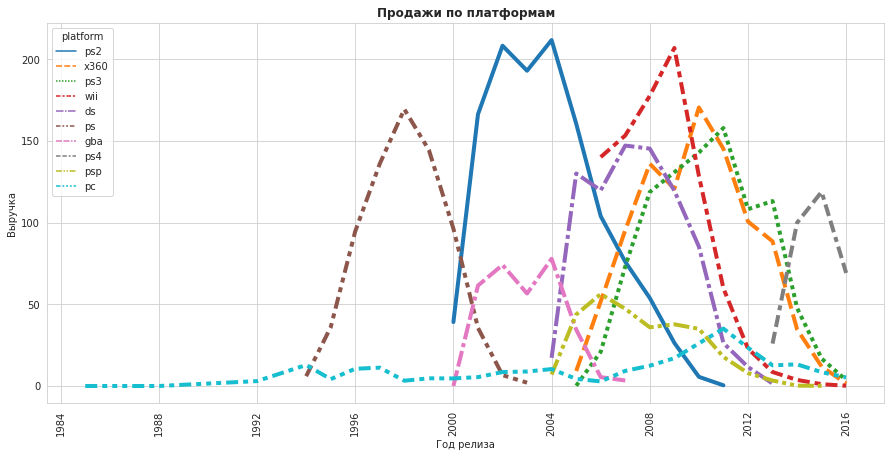

In [57]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.lineplot(data=top_platforms_df, linewidth=4)
plt.title('Продажи по платформам', weight='bold')
plt.xlabel('Год релиза')
plt.xticks(rotation=90)
plt.ylabel('Выручка')
plt.show()

In [58]:
all_platforms_df = df.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()

In [59]:
all_platforms_df.query('total_sales > 0')['platform'].value_counts()

pc      26
gb      13
ps3     12
x360    12
ps2     12
psp     12
nes     12
wii     11
ps      10
snes    10
2600    10
ds      10
xb       9
n64      8
gba      8
dc       7
gc       7
3ds      7
psv      6
sat      6
wiiu     5
gen      5
ps4      4
ng       4
xone     4
ws       3
3do      2
scd      2
tg16     1
pcfx     1
gg       1
Name: platform, dtype: int64

In [60]:
all_platforms_df.query('total_sales > 0')['platform'].value_counts().describe()

count    31.000000
mean      7.741935
std       5.079158
min       1.000000
25%       4.000000
50%       7.000000
75%      10.500000
max      26.000000
Name: platform, dtype: float64

**Выводы:**
1. Основной срок жизни платформ за весь рассматриваемый период в диапазоне 5-11 лет. Медианный срок жизни приставок 7 лет, средний - 8. Различия обусловлены влиянием ПК (26 лет) и более долгим сроком жизни популярных приставок. Например, срок жизни каждого поколения Sony Play Station, X360 (Microsoft), DS/GB/Wii (Nintendo) - 10-12 лет.
2. Графики выручки приставок колоколообразные: есть рост продаж (на промежутке 3 лет), пик (на промежутке 0-2 лет), далее - спад. Как правило (для популярных платформ), в середине срока жизни, то есть через 5-6 лет выходит новая приставка, а еще через 3-4 года - старая полностью выводится из обращения.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [61]:
d = datetime.datetime.strptime('2010', '%Y')
(df.query('year_of_release >= @d')
            .pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum')
            .dropna(axis=1, how='all'))

platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2010-01-01,0.30,85.35,26.15,5.64,142.96,NaN,35.04,NaN,128.67,NaN,170.55,NaN
2011-01-01,63.20,26.33,35.16,0.45,157.98,NaN,17.82,4.63,59.79,NaN,145.23,NaN
2012-01-01,51.76,11.67,23.45,NaN,108.27,NaN,7.95,16.19,22.94,17.56,100.72,NaN
2013-01-01,56.57,1.54,12.66,NaN,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014-01-01,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015-01-01,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [62]:
d = datetime.datetime.strptime('2014', '%Y')
actual_df = df.query('year_of_release >= @d')
actual_df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015-01-01 00:00:00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014-01-01 00:00:00,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014-01-01 00:00:00,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [63]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   object 
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1032 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), object(5)
memory usage: 171.5+ KB


**Вывод:**
1. Для анализа возьмем данные за последние 3 года.
2. Перечень актуальных на следующий год приставок: 
 - PS4 (Sony), XOne (Microsoft), 3DS (Nintendo) - лидеры продаж. Продажи первых двух приставок в 2013-15 гг растут, 3DS - снижаются; 
 - PC - всегда актуален, 2011-15 гг наблюдается существенное падение продаж.
3. Выбывающие приставки: PSV (Sony), WiiU (Nintendo) - фаза падения длится уже несколько лет.  
4. Сформировали датасет actual_df по условиям выше: его объем порядка 10% от первоначального, остались пропуски в 2 столбцах оценки и столбце рейтинга, их доля 57%, 47%, 39% соответственно.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

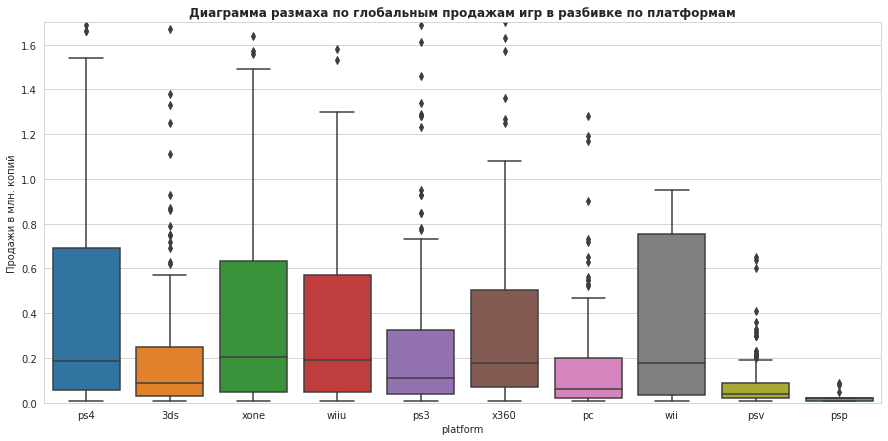

In [64]:
plt.figure(figsize=(15, 7))
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам', weight='bold')
plt.ylim(0, 1.7)
sns.boxplot(data=actual_df, y='total_sales', x='platform')
plt.ylabel('Продажи в млн. копий')
plt.show()

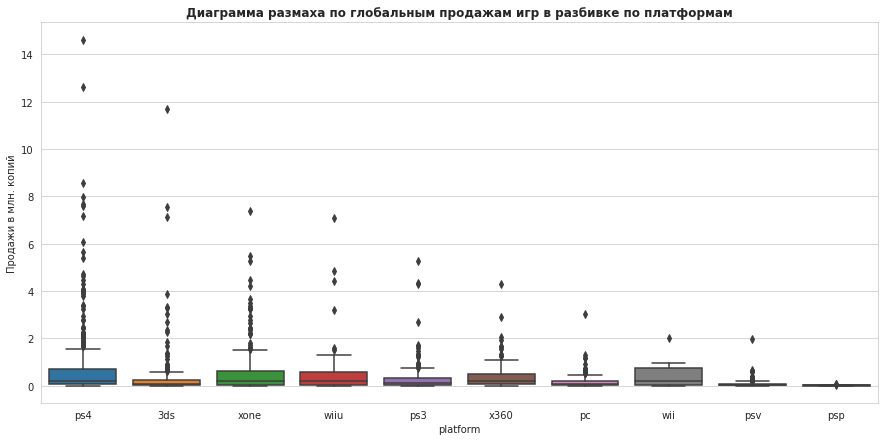

In [65]:
plt.figure(figsize=(15, 7))
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам', weight='bold')
sns.boxplot(data=actual_df, y='total_sales', x='platform')
plt.ylabel('Продажи в млн. копий')
plt.show()

In [66]:
actual_df.pivot_table(index='name', columns='platform',values='total_sales', aggfunc='sum').describe()

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


In [67]:
actual_df.query('total_sales > 7.5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015-01-01 00:00:00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014-01-01 00:00:00,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014-01-01 00:00:00,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,ps4,2015-01-01 00:00:00,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015-01-01 00:00:00,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,call of duty: advanced warfare,ps4,2014-01-01 00:00:00,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,ps4,2016-01-01 00:00:00,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,super smash bros. for wii u and 3ds,3ds,2014-01-01 00:00:00,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55


**Вывод:**
1. По всем консолям средняя выручка существенно выше медианной, так как некоторое игры дают большие продажи. То есть, игр выпущено много, но основные продажи формирует только определенное их количество (принцип Паретто). 
2. Лучшая платформа по продажам, по количеству игр - PS4, самые крутые "бестселлеры" тоже на ней.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

In [68]:
actual_df_ps4 = actual_df[['name', 'platform', 'critic_score', 'user_score', 'total_sales']
                         ].query('platform == "ps4"')
actual_df_ps4

,name,platform,critic_score,user_score,total_sales
31,call of duty: black ops 3,ps4,NaN,NaN,14.63
42,grand theft auto v,ps4,97.0,8.3,12.62
77,fifa 16,ps4,82.0,4.3,8.58
87,star wars battlefront (2015),ps4,NaN,NaN,7.98
92,call of duty: advanced warfare,ps4,83.0,5.7,7.66
...,...,...,...,...,...
16497,root letter,ps4,69.0,7.5,0.01
16500,shin hayarigami 2,ps4,NaN,NaN,0.01
16523,dungeons 2,ps4,61.0,7.9,0.01
16527,carmageddon: max damage,ps4,51.0,5.5,0.01


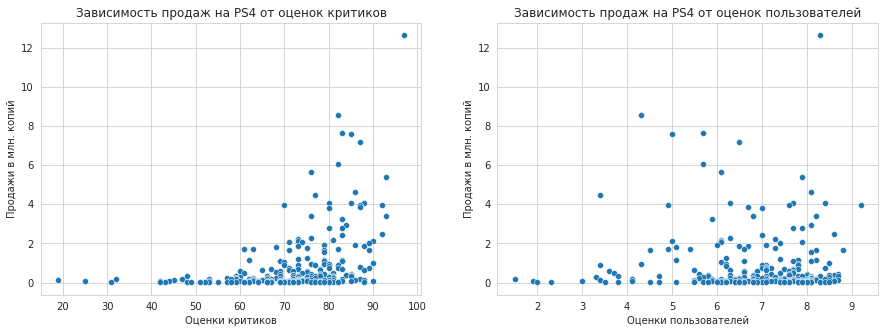

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.scatterplot(data=actual_df_ps4, y='total_sales', x='critic_score', palette='bright', ax=ax1
               ).set(title='Зависимость продаж на PS4 от оценок критиков')
sns.scatterplot(data=actual_df_ps4, y='total_sales', x='user_score', palette='bright', ax=ax2
               ).set(title='Зависимость продаж на PS4 от оценок пользователей')
ax1.set(ylabel='Продажи в млн. копий', xlabel='Оценки критиков')
ax2.set(ylabel='Продажи в млн. копий', xlabel='Оценки пользователей')
plt.show()

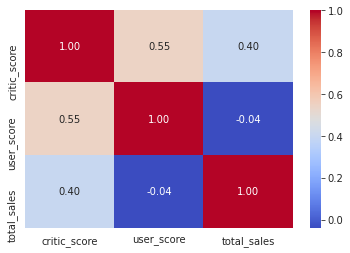

In [70]:
sns.heatmap(actual_df_ps4.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

По платформе XOne :


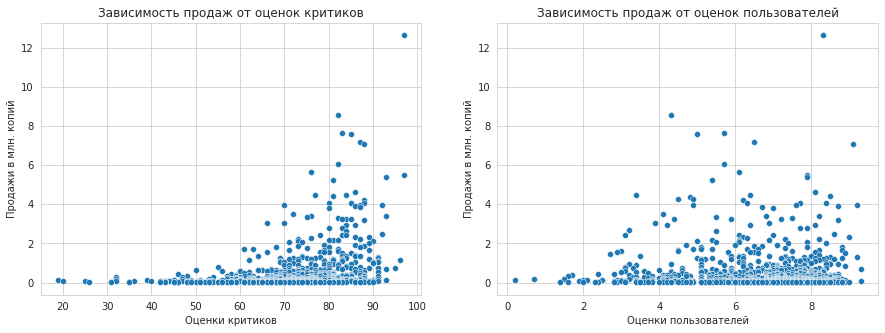

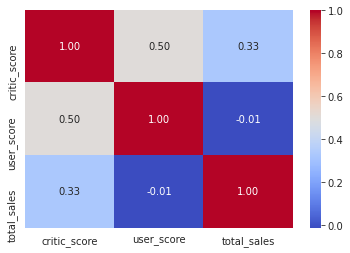

По платформе 3DS :


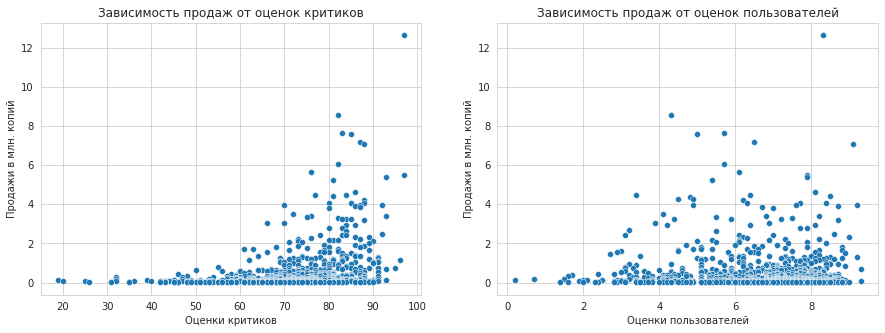

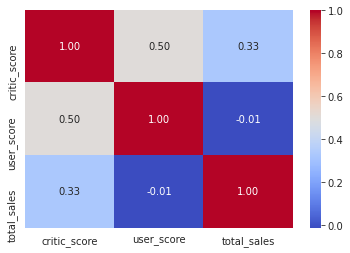

По платформе PC :


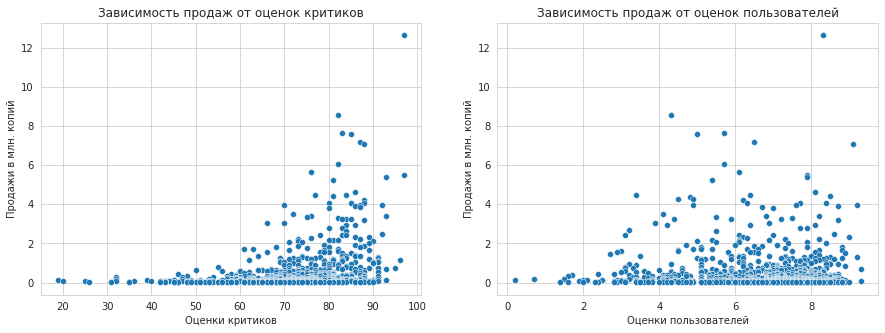

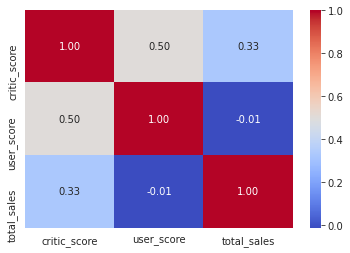

In [71]:
for platform in ['XOne', '3DS', 'PC']:
    print('По платформе', platform, ':')
    actual_df_ = actual_df[['name', 'platform', 'critic_score', 'user_score', 'total_sales']
                          ].query('platform != @platform')
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5)) #plt.figure(figsize=(15, 7))
    sns.scatterplot(data=actual_df_, y='total_sales', x='critic_score', palette='bright', ax=ax1
                   ).set(title='Зависимость продаж от оценок критиков')
    sns.scatterplot(data=actual_df_, y='total_sales', x='user_score', palette='bright', ax=ax2
                   ).set(title='Зависимость продаж от оценок пользователей')
    ax1.set(ylabel='Продажи в млн. копий', xlabel='Оценки критиков')
    ax2.set(ylabel='Продажи в млн. копий', xlabel='Оценки пользователей')
    plt.show()
    sns.heatmap(actual_df_.corr(), cmap='coolwarm', annot=True, fmt='.2f')
    plt.show()

In [72]:
actual_df_ = actual_df[['name', 'platform', 'critic_score', 'user_score', 'total_sales']].query('platform != "PS4"')

**Выводы:**
1. На диаграмме видна зависимость роста выручки от положительной оценки критиков, соответственно, корреляция 0.4, существенная и положительная. В тоже время, достаточно много игр с высокой оценкой критиков и слабой выручкой.
2. Выраженной зависимости продаж от оценки пользователей на графике нет, корреляция отсутствует.
3. Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных).
4. Данные выводы характерны и для остальных платформ.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

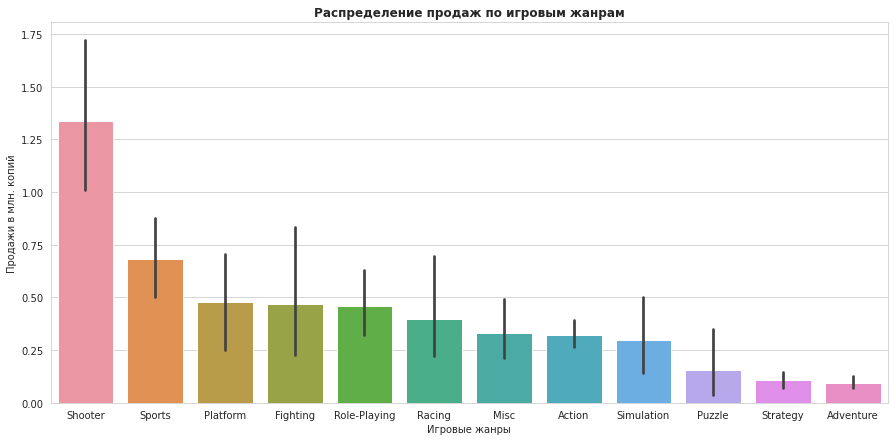

In [73]:
plt.figure(figsize=(15, 7))
plt.title('Распределение продаж по игровым жанрам', weight='bold')
sns.barplot(data=actual_df, x='genre', y='total_sales', 
            order=actual_df.groupby('genre')['total_sales'].agg('mean').sort_values(ascending=False).index)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровые жанры')
plt.show()

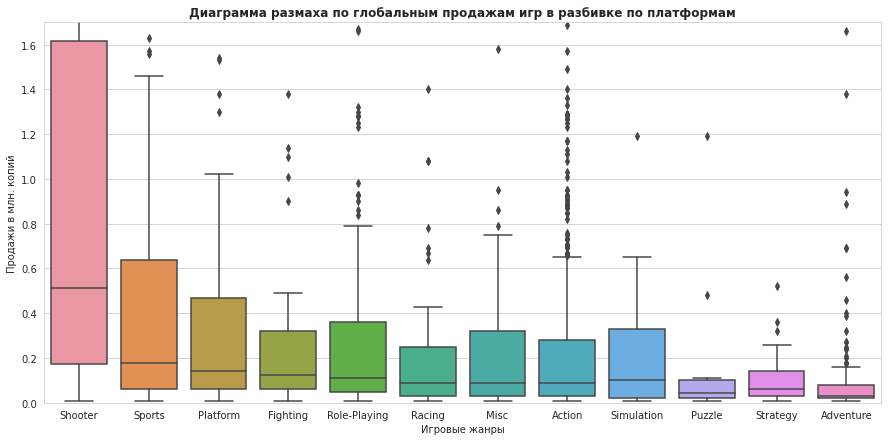

In [74]:
plt.figure(figsize=(15, 7))
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам', weight='bold')
plt.ylim(0, 1.7)
sns.boxplot(data=actual_df, y='total_sales', x='genre', 
            order=actual_df.groupby('genre')['total_sales'].agg('mean').sort_values(ascending=False).index)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровые жанры')
plt.show()

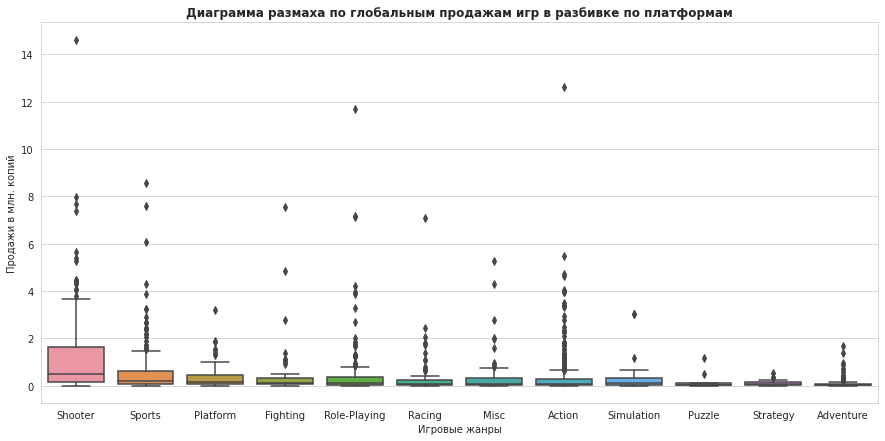

In [75]:
plt.figure(figsize=(15, 7))
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам', weight='bold')
sns.boxplot(data=actual_df, y='total_sales', x='genre', 
            order=actual_df.groupby('genre')['total_sales'].agg('mean').sort_values(ascending=False).index)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровые жанры')
plt.show()

**Выводы:** 
1. Наиболее продаваемые жанры - шутеры, спортивные игры. Наименьшую выручку приносят стратегии и приключенческие игры.
2. Медианное значение продаж по шутерам порядка 0.5 млн.копий, основная масса продаж в диапазоне 0.2-1.6 млн.копий. В других жанрах эти показатели существенно ниже. В каждом из жанров есть успешные (гораздо лучше основной массы) продукты. Наибольшее количество таких в шутерах, экшенах, ролевых и спортивных играх.  


## Шаг 4. Составьте портрет пользователя каждого региона (NA, EU, JP)

In [77]:
def pop_col(col, region):
    region_df = actual_df.pivot_table(
        index=col, values=region, aggfunc='sum').sort_values(
        by=region, ascending=False).reset_index()
    region_df.loc[5:, col] = 'other'
    return region_df.groupby([col]).sum().sort_values(by=region, ascending=False)

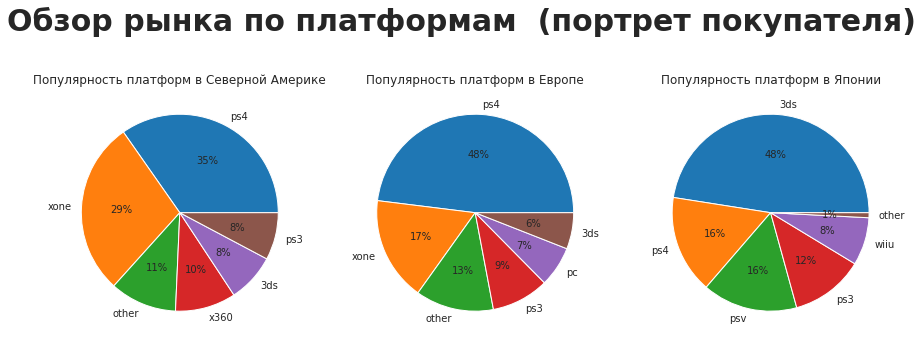

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 6))
fig.suptitle('Обзор рынка по платформам  (портрет покупателя)', size=30, fontweight='bold')

pop_col('platform', 'na_sales').plot.pie(y='na_sales', autopct='%1.0f%%', legend=False, ax=ax1)
pop_col('platform', 'eu_sales').plot.pie(y='eu_sales', autopct='%1.0f%%', legend=False, ax=ax2)
pop_col('platform', 'jp_sales').plot.pie(y='jp_sales', autopct='%1.0f%%', legend=False, ax=ax3)

ax1.set_title('Популярность платформ в Северной Америке')
ax2.set_title('Популярность платформ в Европе')
ax3.set_title('Популярность платформ в Японии')
ax1.set(ylabel='')
ax2.set(ylabel='')
ax3.set(ylabel='')

plt.show()

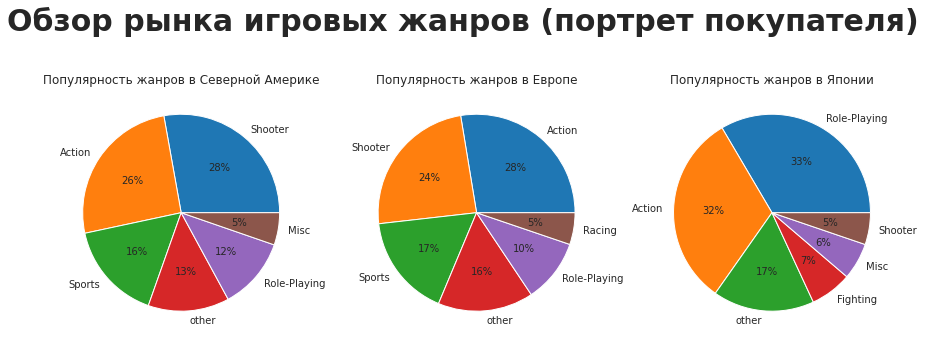

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 6))
fig.suptitle('Обзор рынка игровых жанров (портрет покупателя)', size=30, fontweight='bold')

pop_col('genre', 'na_sales').plot.pie(y='na_sales', autopct='%1.0f%%', legend=False, ax=ax1)
pop_col('genre', 'eu_sales').plot.pie(y='eu_sales', autopct='%1.0f%%', legend=False, ax=ax2)
pop_col('genre', 'jp_sales').plot.pie(y='jp_sales', autopct='%1.0f%%', legend=False, ax=ax3)

ax1.set_title('Популярность жанров в Северной Америке')
ax2.set_title('Популярность жанров в Европе')
ax3.set_title('Популярность жанров в Японии')
ax1.set(ylabel='')
ax2.set(ylabel='')
ax3.set(ylabel='')

plt.show()

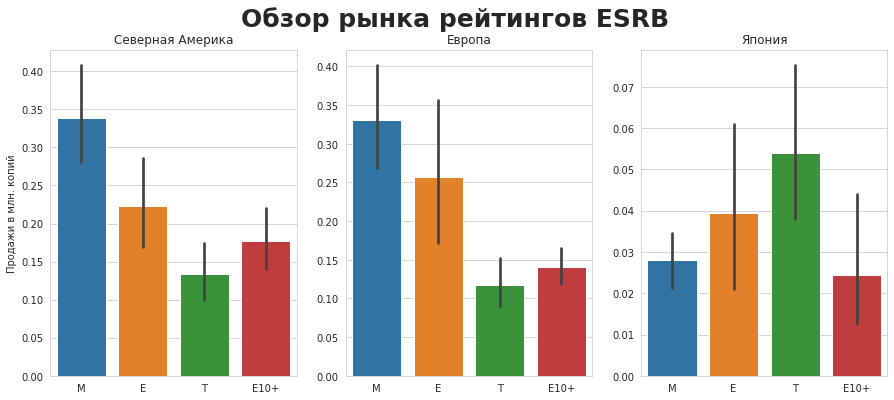

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 6))
fig.suptitle('Обзор рынка рейтингов ESRB', size=25, fontweight='bold')

sns.barplot(data=actual_df, x='rating', y='na_sales', ax=ax1)
sns.barplot(data=actual_df, x='rating', y='eu_sales', ax=ax2)
sns.barplot(data=actual_df, x='rating', y='jp_sales', ax=ax3)

ax1.set_title('Северная Америка')
ax2.set_title('Европа')
ax3.set_title('Япония')
ax1.set(ylabel='Продажи в млн. копий')
ax2.set(ylabel='')
ax3.set(ylabel='')
ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')

plt.show()

Расшифровка значений рейтингов возрастных категорий:
- E - для всех возрастных категорий;
- E10+ - для лиц старше 10 лет;
- T - для лиц старше 13 лет;
- M - для лиц старше 17 лет;

**Выводы:**
1. В Северной Америке пользователь - это человек в возрасте 17 лет и старше, предпочитает в основном платформу PS4 или XOne, играет в шутеры/экшен игры.
2. В Европейском союзе пользователь - это человек в возрасте 17 лет и старше, предпочитает в основном платформу PS4, играет в экшен игры/шутеры.
3. В Японии пользователь - это человек в возрасте 13 лет и старше, предпочитает в основном платформу 3DS, играет в ролевые или экшен игры.
4. Портреты игроков в NA и EU очень похожи и отличаются от JP, что обусловленно культурными особенностями. Производитель приставки 3DS компания Nintendo является национальным символом Японии и однозначно преобладает на родном рынке.

## Шаг 5. Проверьте гипотезы

### Проверьте гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC равны.

Гипотеза H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Так как выборки независимые, а альтернативная гипотеза не ограничивается, то необходимо провести двухвыборочный двухсторонний t-тест.

In [81]:
df.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum'
              ).query('(platform == "xone") & (total_sales > 0)')

total_sales
platform year_of_release             
xone     2013-01-01             18.96
         2014-01-01             54.07
         2015-01-01             60.14
         2016-01-01             26.15

- сравнение платформ необходимо делать на одном периоде 2013-2016 гг.

In [82]:
d = datetime.datetime.strptime('2013', '%Y')
sample1 = df.query('(platform == "xone") & (user_score > 0)')['user_score']
sample2 = df.query('(platform == "pc") & (year_of_release >= @d) & (user_score > 0)')['user_score']

print(f'среднее первой выборки: {np.mean(sample1)}')
print(f'среднее второй выборки: {np.mean(sample2)}')

alpha = 0.05

results = st.ttest_ind(sample1, sample2)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки: 6.521428571428572
среднее второй выборки: 6.26624203821656
p-значение: 0.13235357785478058
Не получилось отвергнуть нулевую гипотезу


**Вывод:** нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не отвергается, так как вероятность получить наблюдаемое на выборке значение p-value = 0.13, что больше уровня статистической значимости 0.05. Это не значит, что гипотеза точно верна — просто по собранным данным её нельзя с уверенностью отвергнуть.

### Проверьте гипотезу о том, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Гипотеза H0 - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Гипотеза H1 - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

Так как выборки независимые, а альтернативная гипотеза не ограничивается, то необходимо провести двухвыборочный двухсторонний t-тест.

In [84]:
sample1 = df.query('(genre == "Action") & (user_score > 0)')['user_score']
sample2 = df.query('(genre == "Sports") & (user_score > 0)')['user_score']

print(f'среднее первой выборки: {np.mean(sample1)}')
print(f'среднее второй выборки: {np.mean(sample2)}')

alpha = 0.05

results = st.ttest_ind(sample1, sample2)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки: 7.054043715846995
среднее второй выборки: 6.962522686025407
p-значение: 0.10920697079316032
Не получилось отвергнуть нулевую гипотезу


**Вывод:** гипотеза о том, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, не отвергается, p-value = 0.11, что больше уровня статистической значимости 0.05.

## Шаг 6. Общий вывод

1. В рамках предобработки данных провели следующие действия:
- названия столбцов привели к нижнему регистру;
- удалось заполнить часть пропусков в столбцах `year_of_release`, `rating` за счет имеющихся данных по этим играм по другим платформам;
- данные со значениями "будет определено" / "еще не присвоено" заменили на NaN;
- добавили столбец с суммарными продажами.

2. Исследовательский анализ данных показал, что:
- бурный рост игровой индустрии начался с 1993 года, пик пришелся на 2008-2009 годы. Мировой финансовый кризис 2008 года существенно отразился и на играх - рынок игр резко падает. С 2012 года продолжается плавное падение вплоть до 2016 года, в том числе за счет перераспределения рынка с консолей на мобильные и онлайн приложения. Ввиду того, что рынок существенно изменился, то для анализа и прогнозирования будут важны свежие данные, например, за последние 3 года;
- основной срок жизни платформ за весь рассматриваемый период в диапазоне 5-11 лет. Медианный срок жизни приставок 7 лет, средний - 8. Различия обусловлены влиянием ПК (существует 26 лет) и более долгим сроком жизни популярных приставок. Например, срок жизни каждого поколения Sony Play Station, X360 (Microsoft), DS/GB/Wii (Nintendo) - 10-12 лет. Графики выручки приставок колоколообразные: есть рост продаж (на промежутке 3 лет), пик (на промежутке 0-2 лет), далее - спад. Как правило (для популярных платформ), в середине срока жизни, то есть через 5-6 лет выходит новая приставка, а еще через 3-4 года - старая полностью выводится из обращения;
- актуальные на следующий год приставки: PS4 (Sony), XOne (Microsoft), 3DS (Nintendo) - лидеры продаж. Продажи первых двух приставок в 2013-15 гг растут, 3DS - снижаются. PC - всегда актуален, за период 2011-15 гг наблюдается существенное падение продаж;
- для анализа взяли данные за последние 3 года. Сформировали датасет actual_df по условиям выше: его объем порядка 10% от первоначального, остались пропуски в 2 столбцах оценки и столбце рейтинга, их доля 42%, 41%, 32% соответственно;
- по всем консолям средняя выручка существенно выше медианной, так как некоторое игры дают большие продажи. То есть, игр выпущено много, но основные продажи формирует только определенное их количество (принцип Паретто). Лучшая платформа по продажам и по количеству игр - PS4, самые крутые "бестселлеры" тоже на ней;
- на рост продаж влияет положительная оценка критиков, корреляция 0.4. В тоже время, достаточно много игр с высокой оценкой критиков и слабой выручкой. Продажи не зависят от оценки пользователей, корреляция отсутствует. Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных);
- наиболее продаваемые жанры - шутеры, спортивные игры. Наименьшую выручку приносят стратегии и приключенческие игры. Медианное значение продаж по шутерам порядка 0.5 млн.копий, основная масса продаж в диапазоне 0.2-1.6 млн.копий. В других жанрах эти показатели существенно ниже. В каждом из жанров есть успешные (гораздо лучше основной массы) продукты. Наибольшее количество таких в шутерах, экшенах, ролевых и спортивных играх.

3. Портреты пользователей по регионам:
- в Северной Америке пользователь - это человек в возрасте 17 лет и старше, предпочитает в основном платформу PS4 или XOne, играет в шутеры/экшен игры.
- в Европейском союзе пользователь - это человек в возрасте 17 лет и старше, предпочитает в основном платформу PS4, играет в экшен игры/шутеры.
- в Японии пользователь - это человек в возрасте 13 лет и старше, предпочитает в основном платформу 3DS, играет в ролевые или экшен игры.
- портреты игроков в NA и EU очень похожи и отличаются от JP, что обусловленно культурными особенностями. Производитель приставки 3DS компания Nintendo является национальным символом Японии и однозначно преобладает на родине.

4. Проверка гипотез:
- нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не отвергается, так как вероятность получить наблюдаемое на выборке значение p-value = 0.13, что больше уровня статистической значимости 0.05.
- гипотеза о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковые, не отвергается, p-value равно 0.11, что больше уровня статистической значимости 0.05.

5. Технические рекомендации заказчику:
- в столбцах `critic_score`, `user_score`, `rating` существенная доля пропусков (38-51%). Предположительные причины наличия пропусков - ошибки при слиянии/объединении/преобразовании данных из разных источников при формировании датасета, либо отсутствие таких данных в принципе (игры не оценивались, не рейтинговались). Необходимо проанализировать причины образования пропусков и, по возможности, устранить их.